# **1. Data Collection**

In [1]:
# Imports
import praw
import pandas as pd
import numpy as np

### Initialize PRAW API

In [3]:
# Initialize PRAW
reddit = praw.Reddit(
    client_id='qSrQqSrnV9EgIimmHRjj7Q',
    client_secret='W9uIYSMSrekNc77Riw-IUfAFAFebAA',
    user_agent='myredditapp:v1.2.3 by u/Independent_Math_881',
    username='Independent_Math_881',
    password='DSI911!123'
)

### __WSB__: Scrape posts from the *WallStreetBets* subreddit, across each new, controversial, hot, rising and top posts, to keep within permitted rate limitations.  
#### Note, this was done on 10/19/23 and included 2,608 unique posts. 

In [18]:
# Write function to pull and aggregate subreddit data posts, remove duplicates and convert to dataframe 
def post_aggregator(subreddit_name):
    x_subreddit = reddit.subreddit(subreddit_name)
    new_posts = x_subreddit.new(limit=999)
    controversial_posts = x_subreddit.controversial(limit=999)
    hot_posts = x_subreddit.hot(limit=999)
    rising_posts = x_subreddit.rising(limit=999)
    top_posts = x_subreddit.top(limit=999)
    
    data_agg = []

    # Aggregate posts
    for post in new_posts:
        data_agg.append([post.created_utc, post.title, post.selftext, post.subreddit])
    for post in controversial_posts:
        data_agg.append([post.created_utc, post.title, post.selftext, post.subreddit])
    for post in hot_posts:
        data_agg.append([post.created_utc, post.title, post.selftext, post.subreddit])
    for post in rising_posts:
        data_agg.append([post.created_utc, post.title, post.selftext, post.subreddit])
    for post in top_posts:
        data_agg.append([post.created_utc, post.title, post.selftext, post.subreddit])

    # Turn aggregated data into a dataframe
    data_agg = pd.DataFrame(data_agg, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
    
    # Drop duplicates
    data_agg = data_agg[~data_agg.duplicated(['created_utc', 'title', 'self_text', 'subreddit'])]
    
    return data_agg

In [19]:
# Run function on WallStreetBets data
wsb = post_aggregator('wallstreetbets')

In [20]:
# Preview of df and size
print(wsb.shape)
wsb.head()

(2608, 4)


,created_utc,title,self_text,subreddit
0,1.697752e+09,"US House reps can’t elect a speaker, shutdown ...",how to inverse US government functioning\n\nBo...,wallstreetbets
1,1.697751e+09,Alright geniuses; give me a home buying advice 😅,Would you buy an apartment with current intere...,wallstreetbets
2,1.697751e+09,Removal of Worthless Security,TD telling me how regarded I am. Fine! I didn...,wallstreetbets
3,1.697750e+09,Inflation is following the same steps as 70's,,wallstreetbets
4,1.697750e+09,Calls on Tesla,,wallstreetbets


In [35]:
# Save data as .csv
wsb.to_csv('data/wsb_raw.csv', index=False)

### __CMS__: Scrape posts from the *CryptoMoonShots* subreddit, across each new, controversial, hot, rising and top posts, to keep within permitted rate limitations.  
#### Note, this was done on 10/19/23 and included 2,661 unique posts. 

In [25]:
# Run function on CryptoMoonShots data
cms = post_aggregator('CryptoMoonShots')

In [36]:
# Preview of df and size
print(cms.shape)
cms.head()

(2661, 4)


,created_utc,title,self_text,subreddit
0,1.697750e+09,PonyShibaInu - an adorable unique hybrid of Sh...,Pony Shiba Inu is the hottest new meme coin in...,CryptoMoonShots
1,1.697749e+09,While you hunt meme and trashcoins Amazon rele...,I recommend to read more on either https://euc...,CryptoMoonShots
2,1.697746e+09,Could $CUMINU $8m mc beat OnlyFans valued at $...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots
3,1.697745e+09,The Revolutionary Arsenal 2.0: Elevating Your ...,"\nGamers and blockchain enthusiasts, hold on...",CryptoMoonShots
4,1.697740e+09,Qtum Strikes the Perfect Balance: The Blockcha...,The landscape of blockchain technology is cons...,CryptoMoonShots


In [88]:
cms = cms.replace('\\n', '', regex = True)
cms = cms.replace(',', '', regex = True)
cms['title'] = cms['title'].str.strip()
cms['self_text'] = cms['self_text'].str.strip()

In [89]:
cms

,created_utc,title,self_text,subreddit
0,1.697750e+09,PonyShibaInu - an adorable unique hybrid of Sh...,Pony Shiba Inu is the hottest new meme coin in...,CryptoMoonShots
1,1.697749e+09,While you hunt meme and trashcoins Amazon rele...,I recommend to read more on either https://euc...,CryptoMoonShots
2,1.697746e+09,Could $CUMINU $8m mc beat OnlyFans valued at $...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots
3,1.697745e+09,The Revolutionary Arsenal 2.0: Elevating Your ...,Gamers and blockchain enthusiasts hold onto yo...,CryptoMoonShots
4,1.697740e+09,Qtum Strikes the Perfect Balance: The Blockcha...,The landscape of blockchain technology is cons...,CryptoMoonShots
...,...,...,...,...
3171,1.683385e+09,Sparklo Finance – 2600 + registrations 900+ pa...,# Presale phase two is running and it will end...,CryptoMoonShots
3174,1.663357e+09,Hungry Hungry Hippos is a project that boasts ...,# Hungry Hungry Hippos is a project designed ...,CryptoMoonShots
3175,1.669395e+09,Helena Financial V2| Black Friday & Thanksgivi...,Greetings Helenians! These are indeed difficul...,CryptoMoonShots
3177,1.685136e+09,$RBIF - The Future is Bright,$RBIFJust received a $25000000 investmentcommi...,CryptoMoonShots


In [74]:
cms['title'][1]

'While you hunt meme and trashcoins Amazon released AMZ and has huge plans something you maybe should read even in THIS SUB'

In [90]:
# Save data as .csv
cms.to_csv('data/cms_raw.csv', columns = ['created_utc', 'title', 'self_text', 'subreddit'])

### Combine two dataframes into one for main analysis

In [44]:
# Concatenate wsb and cms into df
df = pd.concat([cms, wsb])
df.head()

,created_utc,title,self_text,subreddit
0,1.697750e+09,PonyShibaInu - an adorable unique hybrid of Sh...,Pony Shiba Inu is the hottest new meme coin in...,CryptoMoonShots
1,1.697749e+09,While you hunt meme and trashcoins Amazon rele...,I recommend to read more on either https://euc...,CryptoMoonShots
2,1.697746e+09,Could $CUMINU $8m mc beat OnlyFans valued at $...,Cummuniti the new 18+ platform will change the...,CryptoMoonShots
3,1.697745e+09,The Revolutionary Arsenal 2.0: Elevating Your ...,"\nGamers and blockchain enthusiasts, hold on...",CryptoMoonShots
4,1.697740e+09,Qtum Strikes the Perfect Balance: The Blockcha...,The landscape of blockchain technology is cons...,CryptoMoonShots


In [46]:
# Binarize 'subreddit' column
df['subreddit'] = np.where(df['subreddit'] == 'wallstreetbets', 0, 1)
df['text'] = df['title'] + ' ' + df['self_text']
df.head()

,created_utc,title,self_text,subreddit,text
0,1.697750e+09,PonyShibaInu - an adorable unique hybrid of Sh...,Pony Shiba Inu is the hottest new meme coin in...,1,PonyShibaInu - an adorable unique hybrid of Sh...
1,1.697749e+09,While you hunt meme and trashcoins Amazon rele...,I recommend to read more on either https://euc...,1,While you hunt meme and trashcoins Amazon rele...
2,1.697746e+09,Could $CUMINU $8m mc beat OnlyFans valued at $...,Cummuniti the new 18+ platform will change the...,1,Could $CUMINU $8m mc beat OnlyFans valued at $...
3,1.697745e+09,The Revolutionary Arsenal 2.0: Elevating Your ...,"\nGamers and blockchain enthusiasts, hold on...",1,The Revolutionary Arsenal 2.0: Elevating Your ...
4,1.697740e+09,Qtum Strikes the Perfect Balance: The Blockcha...,The landscape of blockchain technology is cons...,1,Qtum Strikes the Perfect Balance: The Blockcha...


In [47]:
# Save down .csv file
df.to_csv('data/agg_data_wsb_cms.csv', index = False)

## EDA & Preprocessing

In [71]:
reddit = df[['subreddit', 'text']]
reddit.head()

,subreddit,text
0,1,Introducing the WAGMI Competition: Win Big wit...
1,1,Cummuniti 18+ platform ready to take over adul...
2,1,Rhytmic -Future Of Defi Tracking And Data Insi...
3,1,Introducing $FUFU Token: The Chinese Meme Toke...
4,1,"No crap coins, Amazon released AMZ Token. Get ..."


In [13]:
reddit.shape

(5283, 2)

In [14]:
reddit.subreddit.value_counts(normalize=True)

subreddit
0    0.501798
1    0.498202
Name: proportion, dtype: float64

In [58]:
X = reddit['text']
y = reddit['subreddit']

In [16]:
# Baseline model - 50.5% accuracy
1-y.mean()

0.5017982207079311

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [18]:
# Emily helped here
# change stop_words = 'english' to this where my_additional_stop_words is a list of strings
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])
# list(stop_words)

In [19]:
# Instantiate count vectorizer
cvec = CountVectorizer(stop_words = list(stop_words))
cvec.fit(X_train)

CountVectorizer(stop_words=['our', 'could', 'out', 'sixty', 'either', 'upon',
                            'might', 'interest', 'made', 'too', 'bill',
                            'beforehand', 'system', 'them', 'been', 'less',
                            'something', 'whereas', 'describe', 'so', 'those',
                            'me', 'whose', 'then', 'him', 'myself', 'never',
                            'con', 'is', 'whether', ...])

In [20]:
# Transform the corpus
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)
X_train.shape

(3962, 31254)

In [21]:
X_train_df = pd.DataFrame(X_train.todense(), columns = cvec.get_feature_names_out())

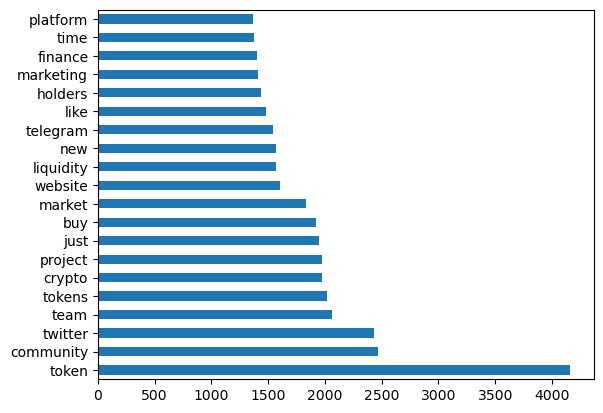

In [228]:
# Plot top occurring words 
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Model#1: Multinomial Naive Bayes (Count Vectorizer)

### Test Score: 0.98

In [234]:
X = reddit['text']
y = reddit['subreddit']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [236]:
# Set up pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'nb': MultinomialNB(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [237]:
# Search over following hyperparameters
pgrid = {
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]
}

In [238]:
# Instantiate gridsearchCV
gs = GridSearchCV(pipe, param_grid = pgrid, cv = 5, n_jobs = 8)

In [239]:
# Fit gridsearchcv to data
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__binary': [False, True],
                         'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 5000, None],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [240]:
gs.best_params_

{'cvec__binary': False,
 'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [241]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9821518350930115
0.9751318764129616


In [242]:
preds = gs.predict(X_test)

In [243]:
confusion_matrix(y_test, preds)

array([[653,  25],
       [  8, 641]], dtype=int64)

## Model #2: Multinomial Naive Bayes (Tfid Vectorizer)

### Test Score: 0.97

In [244]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [253]:
stop_words = text.ENGLISH_STOP_WORDS.union(['https', 'com', 'x200b', 'www', '000'])

In [255]:
tvec = TfidfVectorizer(stop_words = list(stop_words))

In [256]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), columns = tvec.get_feature_names_out())

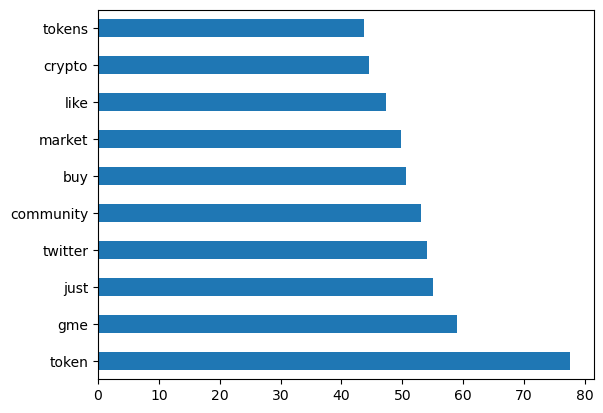

In [260]:
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [282]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [283]:
# Set up pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'nb': MultinomialNB(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [288]:
# Search over following hyperparameters
pgrid = {
    # 'tvec__binary': [False, True],
    'tvec__max_df': [0.9, 0.95],
    'tvec__max_features': [5_000, 7_000, None],
    'tvec__min_df': [1, 3, 5],
    'tvec__ngram_range': [(1, 1), (1,2)],
    'tvec__stop_words': [None, 'english']
}

In [289]:
# Gridsearch CV 
gs = GridSearchCV(pipe, param_grid = pgrid, cv = 5, n_jobs = 8)

In [290]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [5000, 7000, None],
                         'tvec__min_df': [1, 3, 5],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [291]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 5000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [292]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9819004524886877
0.9706103993971364


In [294]:
preds = gs.predict(X_test)

In [295]:
confusion_matrix(y_test, preds)

array([[655,  23],
       [ 16, 633]], dtype=int64)

## Model #3: KNN

### Test Score: 0.90

In [296]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [313]:
# Setup Pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())    
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'knn': KNeighborsClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [315]:
# Parameters 
pgrid = {
    'knn__n_neighbors': [5, 7, 10],
    # 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
    # 'knn__p': [1, 2],
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]    
}

In [316]:
# Grid Search CV
gs = GridSearchCV(pipe, pgrid, cv = 5, n_jobs = 8)

In [317]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid={'cvec__binary': [False, True],
                         'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 5000, None],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'knn__n_neighbors': [5, 7, 10],
                         'knn__weights': ['uniform', 'distance']})

In [ ]:
gs.best_params_

In [319]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9997486173956762
0.9020346646571213


In [318]:
# Random search cv
rs = RandomizedSearchCV(pipe, param_distributions = pgrid, n_iter = 20, n_jobs = 8)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=20, n_jobs=8,
                   param_distributions={'cvec__binary': [False, True],
                                        'cvec__max_df': [0.9, 0.95],
                                        'cvec__max_features': [2000, 5000,
                                                               None],
                                        'cvec__min_df': [1, 2, 3],
                                        'cvec__ngram_range': [(1, 1), (1, 2)],
                                        'cvec__stop_words': [None, 'english'],
                                        'knn__n_neighbors': [5, 7, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']})

In [ ]:
rs.best_params_

In [320]:
print(rs.score(X_train, y_train))
print(rs.score(X_test, y_test))

0.9997486173956762
0.8975131876412962


In [ ]:
# KNN, logreg, RF 
# get metrics on all of them - recll, precision, confusion matrix, get scores 
# lb 502 has some good graphics
# countvectorizer, can do bigrams and trigrams 

## Model #4: Logistic Regression

### Model Score: 0.99

In [72]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [73]:
# Setup Pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())    
])

# pipe.get_params()

In [77]:
# Parameters 
pgrid = {
    'logreg__penalty': ['l2', None],
    # 'logreg__C': [0.1, 0.2, 0.3, 0.5, 0.7, 1.0],
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]    
}

In [78]:
# %%time
rs = RandomizedSearchCV(pipe, param_distributions = pgrid, n_iter = 20, n_jobs = 8)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('logreg', LogisticRegression())]),
                   n_iter=20, n_jobs=8,
                   param_distributions={'cvec__binary': [False, True],
                                        'cvec__max_df': [0.9, 0.95],
                                        'cvec__max_features': [2000, 5000,
                                                               None],
                                        'cvec__min_df': [1, 2, 3],
                                        'cvec__ngram_range': [(1, 1), (1, 2)],
                                        'cvec__stop_words': [None, 'english'],
                                        'logreg__penalty': ['l2', None]})

In [80]:
rs.best_params_

{'logreg__penalty': None,
 'cvec__stop_words': None,
 'cvec__ngram_range': (1, 1),
 'cvec__min_df': 1,
 'cvec__max_features': None,
 'cvec__max_df': 0.95,
 'cvec__binary': True}

In [81]:
print(rs.score(X_train, y_train))
print(rs.score(X_test, y_test))

1.0
0.989409984871407


## Model #5: Random Forest (RF)

### Model Score: 0.98

In [82]:
X = reddit['text']
y = reddit['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95)

In [83]:
# Setup Pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())    
])

pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_est

In [86]:
# Parameters 
pgrid = {
    'rf__n_estimators': [10, 100, 200, 500],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_features': ['sqrt', 'log2', None],
    'cvec__max_df': [0.9, 0.95],
    'cvec__max_features': [2_000, 5_000, None],
    'cvec__min_df': [1, 2, 3],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, 'english'],
    'cvec__binary': [False, True]    
}

In [87]:
rs = RandomizedSearchCV(pipe, pgrid, n_iter = 50, n_jobs = 8)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=50, n_jobs=8,
                   param_distributions={'cvec__binary': [False, True],
                                        'cvec__max_df': [0.9, 0.95],
                                        'cvec__max_features': [2000, 5000,
                                                               None],
                                        'cvec__min_df': [1, 2, 3],
                                        'cvec__ngram_range': [(1, 1), (1, 2)],
                                        'cvec__stop_words': [None, 'english'],
                                        'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_features': ['sqrt', 'log2',
                                                             None],
                                        'rf__n_estimators': [10, 100, 200,
                                                             500]})

In [ ]:
rs.best_params_

In [88]:
print(rs.score(X_train, y_train))
print(rs.score(X_test, y_test))

0.9989911727616646
0.981089258698941
